## Casing Seat Design 

Created by Bhumit Sheth, 2020 

With help from <b>Drilling Engineering (A Complete Well Planning Approach), Neal J Adams</b>

### Introduction 

Casing seat depths are directly affected by geological conditions. In some cases, the prime criterion for selecting casing seats is to cover exposed, severe lost circulation zones. In others, the seat selection may be based on differential sticking problems, perhaps resulting from pressure depletion in a field. In deep wells, however, the primary consideration is usually based on controlling abnormal formation pressures and preventing their exposure to weaker shallow zones. The design criteria of controlling formation pressures generally applies to most drilling areas.

Abnormal Pressure zones are those zones where there are bumps in our pore pressure or fracture gradient pressure. We generally donot encounter such cases but we will take into consideration such cases as well. 

### Bottom Top Casing Seat Selection Approach 

1. We will try not to fracture the gradient and stay below the fracture pressure
2. Avoid any influx of fluids, stay above pore pressure.
3. Adding safety margin. 

Setting depth selection should be made for the deepest strings to be run in the well and then successively designed from the bottom string to the surface. Although this procedure may appear at first to be reversed, it avoids several time-consuming iterative procedures. Surface casing design procedures are based on other crieria. The first criteria for selecting deep casing depths is to let mud weights control formation pressures without fracturing shallow formations. This procedure is implemented bottom-to-top. After these depths have been established, differential pressure sticking considerations are made to determine if the casing string will become stuck when running it into the well. These considerations are made from top-to-bottom, the reverse from the first selection criteria

#### Let's Start

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Data

If you want to use this notebook, you can change the target directory. 

In [117]:
fracture_pressure_data = pd.read_csv("F:\Tarek Ahmed Reservoir Engineering Data\Fracture Pressure.csv")
pore_pressure_data = pd.read_csv("F:\Tarek Ahmed Reservoir Engineering Data\Pore Pressure.csv")

#### Adding Safety Margin

In [118]:
percentage_safety = 2 # 2% Safety margin
safety = percentage_safety/100 
fracture_pressure_safety = (1 - safety) * fracture_pressure_data['Pressure']
pore_pressure_safety = (1 + safety) * pore_pressure_data['Pressure']


#### Plotting our data 

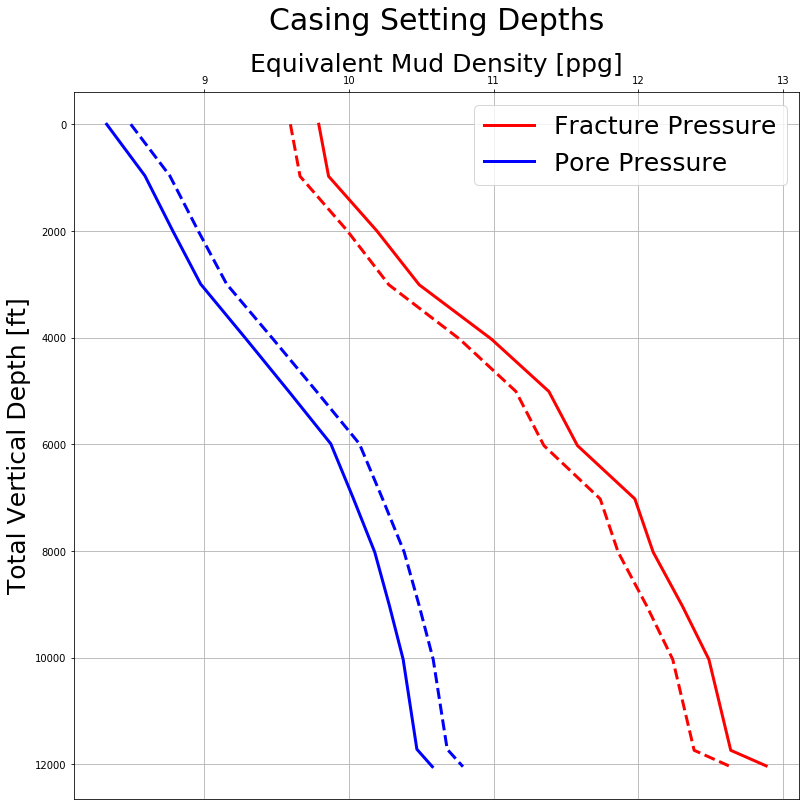

In [119]:
fig, ax = plt.subplots(1, figsize=(13, 13))


# We plot our initial data
plt.plot(fracture_pressure_data['Pressure'], fracture_pressure_data['Depth'] , color="red", linewidth=3, label="Fracture Pressure")
plt.plot(pore_pressure_data['Pressure'], pore_pressure_data['Depth'], color="blue", linewidth=3, label="Pore Pressure")

# And now our data plus/minus a safety margin of 2%
plt.plot(fracture_pressure_safety,fracture_pressure_data['Depth'] , color="red", linewidth=3, linestyle="--")
plt.plot(pore_pressure_safety, pore_pressure_data['Depth'] , color="blue", linewidth=3, linestyle="--")

# -------------- Formatting ------------- Ignore for now
plt.title("Casing Setting Depths", fontsize=30, y=1.08)
label_size = 12

plt.ylabel("Total Vertical Depth [ft]", fontsize=25)
plt.ylim(ax.get_ylim()[::-1])

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
ax.xaxis.set_label_position("top")

plt.xlabel("Equivalent Mud Density [ppg]", fontsize=25)
plt.ticklabel_format()
plt.grid()
plt.legend(fontsize=25)

#### Theory to Code 

Since we use a bottom up approach, we know that at the bottom casing setting depth is governed by the pore pressure at the target depth.This can be done simple by using [-1] with any list. 

In [128]:
bottom_up_pore_pressure = pore_pressure_safety.iloc[-1]
print ("Equivalent pore pressure at depth: ", bottom_up_pore_pressure,"ppg")

Equivalent pore pressure at depth:  10.787995564800001 ppg


In step two, we will interpolate the line from target pore pressure till we hit the fracture pressure pressure, to find the corresponding depth. This can be done with the help of <b>numpy.interp</b> 

In [129]:
second_section_depth = np.interp(bottom_up_pore_pressure, fracture_pressure_safety,fracture_pressure_data["Depth"])
print("Depth at which pore pressure and fracture pressure are equal: ", second_section_depth, " [ft]")

Depth at which pore pressure and fracture pressure are equal:  4085.1935035501606  [ft]


In third step, we define this depth as our second casing seat and we find the pore pressure at this depth. Hence we make a horizontal line, this can be done easily in python. 

In [122]:
second_section_pore_pressure = np.interp(second_section_tvd, pore_pressure_data["Depth"], pore_pressure_safety)
print("Equivalent pore pressure for second section: ", second_section_pore_pressure, " [ppg]")

Equivalent pore pressure for second section:  9.493918195647987  [ppg]


Now we need to repeat this procedure till we hit zero. Follow the same procedure. 

In [130]:
third_section_depth = np.interp(second_section_pore_pressure, fracture_pressure_safety, fracture_pressure_data["Depth"])
print("Depth at which pore pressure and fracture pressure are equal: ", third_section_depth, " [ft]")

Depth at which pore pressure and fracture pressure are equal:  0.0  [ft]


Now we have hit the surface. No more casing seat and now lets plot this. 

In [124]:
casing_seats_tvd = [pore_pressure_data.iloc[-1]["Depth"], second_section_tvd, second_section_tvd, third_section_tvd]
casing_seats_ppg = [pore_pressure_safety.iloc[-1], pore_pressure_safety.iloc[-1], second_section_pore_pressure, second_section_pore_pressure]

We will use <b>matplotlib</b> to plot this dataset.

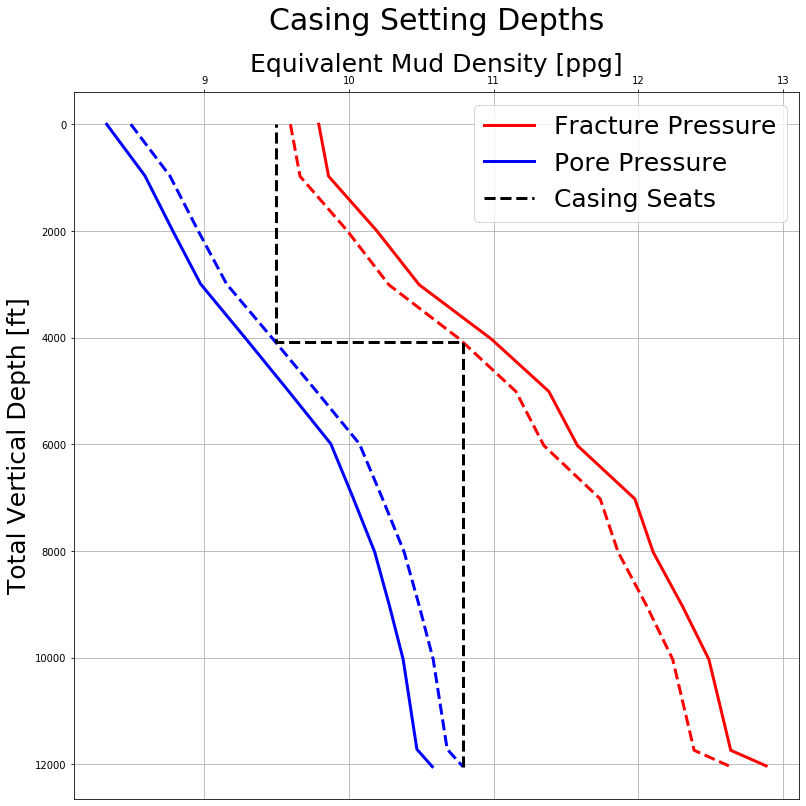

In [125]:
fig, ax = plt.subplots(1, figsize=(13, 13))


# We plot our initial data
plt.plot(fracture_pressure_data['Pressure'], fracture_pressure_data['Depth'] , color="red", linewidth=3, label="Fracture Pressure")
plt.plot(pore_pressure_data['Pressure'], pore_pressure_data['Depth'], color="blue", linewidth=3, label="Pore Pressure")

# And now our data plus/minus a safety margin of 2%
plt.plot(fracture_pressure_safety,fracture_pressure_data['Depth'] , color="red", linewidth=3, linestyle="--")
plt.plot(pore_pressure_safety, pore_pressure_data['Depth'] , color="blue", linewidth=3, linestyle="--")

plt.plot(casing_seats_ppg, casing_seats_tvd, color="black", linestyle="--", linewidth=3, label="Casing Seats")

# -------------- Formatting ------------- Ignore for now
plt.title("Casing Setting Depths", fontsize=30, y=1.08)
label_size = 12

plt.ylabel("Total Vertical Depth [ft]", fontsize=25)
plt.ylim(ax.get_ylim()[::-1])

plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = True, labeltop=True)
ax.xaxis.set_label_position("top")

plt.xlabel("Equivalent Mud Density [ppg]", fontsize=25)
plt.ticklabel_format()
plt.grid()
plt.legend(fontsize=25)